IMPORTS

In [226]:
import pandas as pd
pd.option_context('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from itertools import chain, combinations
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style('darkgrid')

%matplotlib inline

DATA

In [595]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0) # (30155,25), 3 duplicated entries
print(f"Duplicates found and removed: * {df.loc[df.duplicated()].shape[0]} *")
df.drop_duplicates(inplace=True)
print("\nHEAD:")
display(df.head())
print("\nTAIL:")
display(df.tail())
print("\nINFO:")
df.info()

Duplicates found and removed: * 3 *

HEAD:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188



TAIL:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,...,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634



INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null

# EDA

Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

## Target (Price) Analysis
We want to ensure normality in the target data as part of the assumtions for linear regression, so lets look at the log transformation of Price and Price with outliers removed.

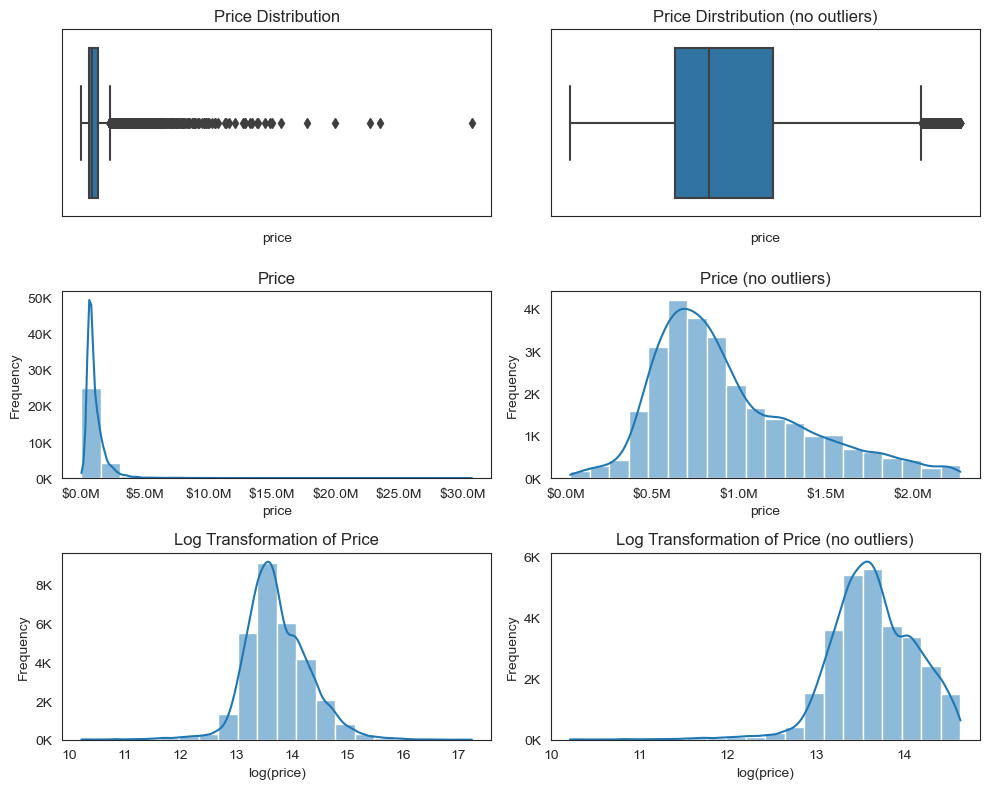

price outliers count: 1991


In [596]:
# Using Interquartile Range method to determine outliers
IQR = df['price'].quantile(.75) - df['price'].quantile(.25)
IQR_scaler = 1.5
price_outlier_u_bound = df['price'].quantile(.75) + IQR_scaler * IQR
price_outlier_l_bound = df['price'].quantile(.25) - IQR_scaler * IQR

# Series with outliers sliced off
price_no_outliers = df.loc[(df['price'] <= price_outlier_u_bound) & \
                           (df['price'] >= price_outlier_l_bound),'price']


fig, ax = plt.subplots(3,2, figsize = (10,8))
# boxplot of target
sns.boxplot(x=df['price'], ax=ax[0][0])
ax[0][0].set_title('Price Distribution')
ax[0][0].set_xticklabels([])

# boxplot of target - target_outliers
sns.boxplot(x=price_no_outliers, ax=ax[0][1])
ax[0][1].set_title('Price Dirstribution (no outliers)')
ax[0][1].set_xticklabels([])

# histogram of target
sns.histplot(df['price'], bins=20, kde=True, ax=ax[1][0])
ax[1][0].set_title('Price')
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlabel('price')
formatter = ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x * 1e-3))
ax[1][0].yaxis.set_major_formatter(formatter)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax[1][0].xaxis.set_major_formatter(formatter)

# histogram of target - target_outliers
sns.histplot(price_no_outliers, bins=20, kde=True, ax=ax[1][1])
ax[1][1].set_title('Price (no outliers)')
ax[1][1].set_ylabel('Frequency')
ax[1][1].set_xlabel('price')
formatter = ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x * 1e-3))
ax[1][1].yaxis.set_major_formatter(formatter)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax[1][1].xaxis.set_major_formatter(formatter)

# histograms of log(target)
sns.histplot(np.log(df['price']), bins=20, kde=True, ax=ax[2][0])
ax[2][0].set_title('Log Transformation of Price')
ax[2][0].set_ylabel('Frequency')
ax[2][0].set_xlabel('log(price)')
formatter = ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x * 1e-3))
ax[2][0].yaxis.set_major_formatter(formatter)

# histograms of log(target - target_outliers)
sns.histplot(np.log(price_no_outliers), bins=20, kde=True, ax=ax[2][1])
ax[2][1].set_title('Log Transformation of Price (no outliers)')
ax[2][1].set_ylabel('Frequency')
ax[2][1].set_xlabel('log(price)')
formatter = ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x * 1e-3))
ax[2][1].yaxis.set_major_formatter(formatter)

# organize axes
plt.tight_layout()
# save fig to png
plt.savefig('imgs/price_outliers.png')
plt.show()
print('price outliers count: {}'.format(df.shape[0] - price_no_outliers.shape[0]))

Log(Price), Price_no_outliers and log(Price) have the most normal-like distributions.

### Price Normality
Lets look deeper on whether we should take the log

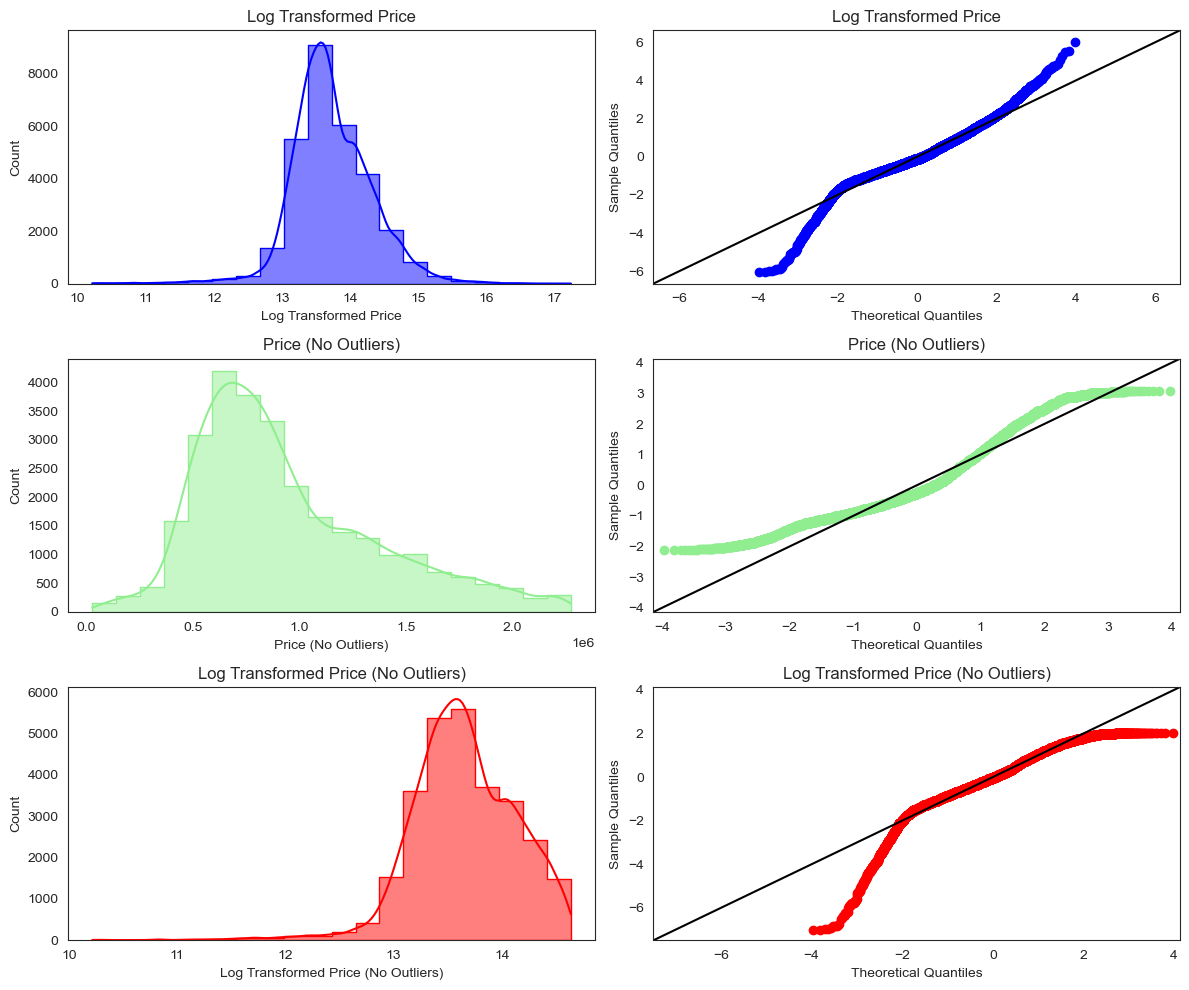

In [597]:
# Compare normality of target_no_outliers vs log_target_no_outliers

# Set up plot and properties of two targets
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
targets = [np.log(df['price']), price_no_outliers, np.log(price_no_outliers)]
labels = ['Log Transformed Price', "Price (No Outliers)", "Log Transformed Price (No Outliers)"]
colors = ["blue", "lightgreen", 'red']

# Plot histograms
for index, ax in enumerate([axes[0][0],axes[1][0],axes[2][0]]):
    sns.histplot(targets[index], bins=20, element="step", kde=True, color=colors[index], ax=ax)
    ax.set_xlabel(labels[index])
    ax.set_title(labels[index])
    
# Plot Q-Q plots
for index, ax in enumerate([axes[0][1],axes[1][1],axes[2][1]]):
    sm.graphics.qqplot(targets[index], dist=stats.norm, line='45', fit=True, ax=ax)
    scatter = ax.lines[0]
    line = ax.lines[1]
    scatter.set_markeredgecolor(colors[index])
    scatter.set_markerfacecolor(colors[index])
    line.set_color("black")
    ax.set_title(labels[index])
    
fig.tight_layout()

From the qq-plots we can rank normality:
1. Log transformed price
2. Price without outliers
3. Log transformed price without outliers
  

### Numeric and Categorical Split
Splitting the dataframe into two for independant EDA

In [598]:
numeric_df = df.select_dtypes([int, float]).copy()
cat_df = df.select_dtypes(object)
numeric_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,47.664740,-122.32940
194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,47.565610,-122.38851
7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,47.610395,-122.29585


## Numeric EDA

In [599]:
display(numeric_df.head())
display(numeric_df.describe(percentiles=[.05,.25,.5,.75,.95]))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015200e+04,30152.000000,30152.000000,30152.000000,3.015200e+04,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000
mean,1.108029e+06,3.413571,2.334671,2112.408729,1.672492e+04,1.543380,1809.839347,476.010812,330.227414,217.396856,1975.159591,90.931348,47.328477,-121.319050
std,8.946277e+05,0.981653,0.889548,974.052997,6.038545e+04,0.567615,878.325182,579.635101,285.770425,245.309503,32.065976,416.492770,1.433181,5.722034
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
5%,4.250000e+05,2.000000,1.000000,940.000000,1.196000e+03,1.000000,830.000000,0.000000,0.000000,0.000000,1916.000000,0.000000,47.261910,-122.386132
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405361,-122.326050
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551385,-122.225635
75%,1.300000e+06,4.000000,3.000000,2619.250000,1.057925e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669911,-122.116236
95%,2.500000e+06,5.000000,4.000000,3890.000000,4.573800e+04,2.000000,3460.000000,1500.000000,780.000000,680.000000,2021.000000,0.000000,47.747316,-121.862909
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can tell immediately that most columns have outliers

### Dropping

In [600]:
# We remove latitude and longitute columns, as they are implicitly determined by the zipcode categorical variable
numeric_df.drop(columns=['lat','long'], inplace=True)

# drop suspicious row with 4 bathrooms and bedrooms but no living space
display(numeric_df.loc[[1549500215], :])
numeric_df.drop(index=1549500215, inplace=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
id,,,,,,,,,,,,
1549500215,1803000.0,4,4.0,3,326701,2.0,2,1,1,0,2021,0


### Heatmap

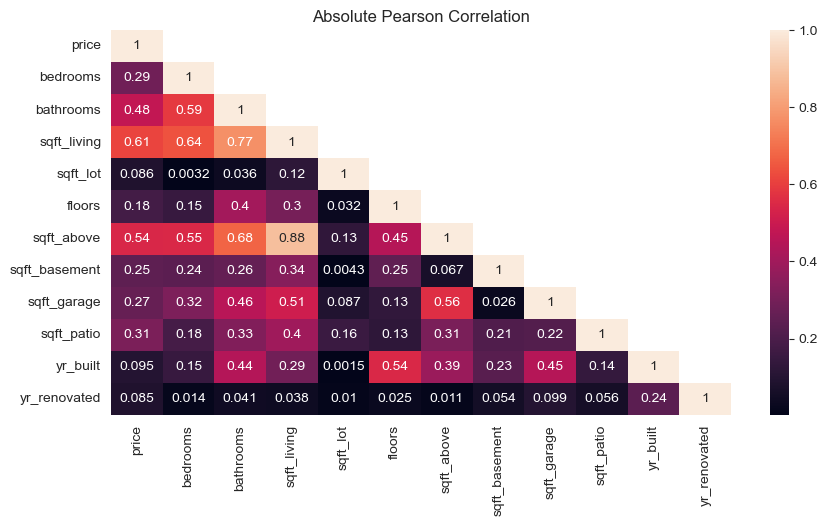

numeric abs(correlation) order: 
sqft_living      0.610040
sqft_above       0.540142
bathrooms        0.481183
sqft_patio       0.313659
bedrooms         0.290017
sqft_garage      0.265311
sqft_basement    0.245532
floors           0.179608
yr_built         0.095408
sqft_lot         0.085952
yr_renovated     0.085088
Name: price, dtype: float64


In [601]:
corr_df = numeric_df.corr().abs()

fig, ax = plt.subplots(figsize=(10,5))
sns.set_style('white')
mask = np.triu(np.ones_like(corr_df), k=1)
sns.heatmap(corr_df, annot=True, mask=mask, ax=ax).set(title='Absolute Pearson Correlation')

plt.show()
print("numeric abs(correlation) order: \n{}".format(corr_df['price'].sort_values(ascending=False)[1:]))

### Home Square feet
From the heatmap, we can see there is a high correlation between the square footage measurements.  
From our understanding of the data, sqft_living encompasses information from sqft_basement, sqft_patio, sqft_above and sqft_garage.  
We could keep just sqft_living, but instead we will make a new column sqft_home, which is a linear combination of these correlated columns, weighted by their correlations with price.  
  
We will redo this process after train test split to avoid Data Leakage

In [602]:
# Create Aggregate feature sqft_home
numeric_df["sqft_home"] = (.61*numeric_df['sqft_living'] + \
                           .54*numeric_df['sqft_above'] + \
                           .25*numeric_df['sqft_basement'] + \
                           .27*numeric_df['sqft_garage'] + \
                           .31*numeric_df['sqft_patio'])

### PairPlots
Now lets plot all numeric features against each other

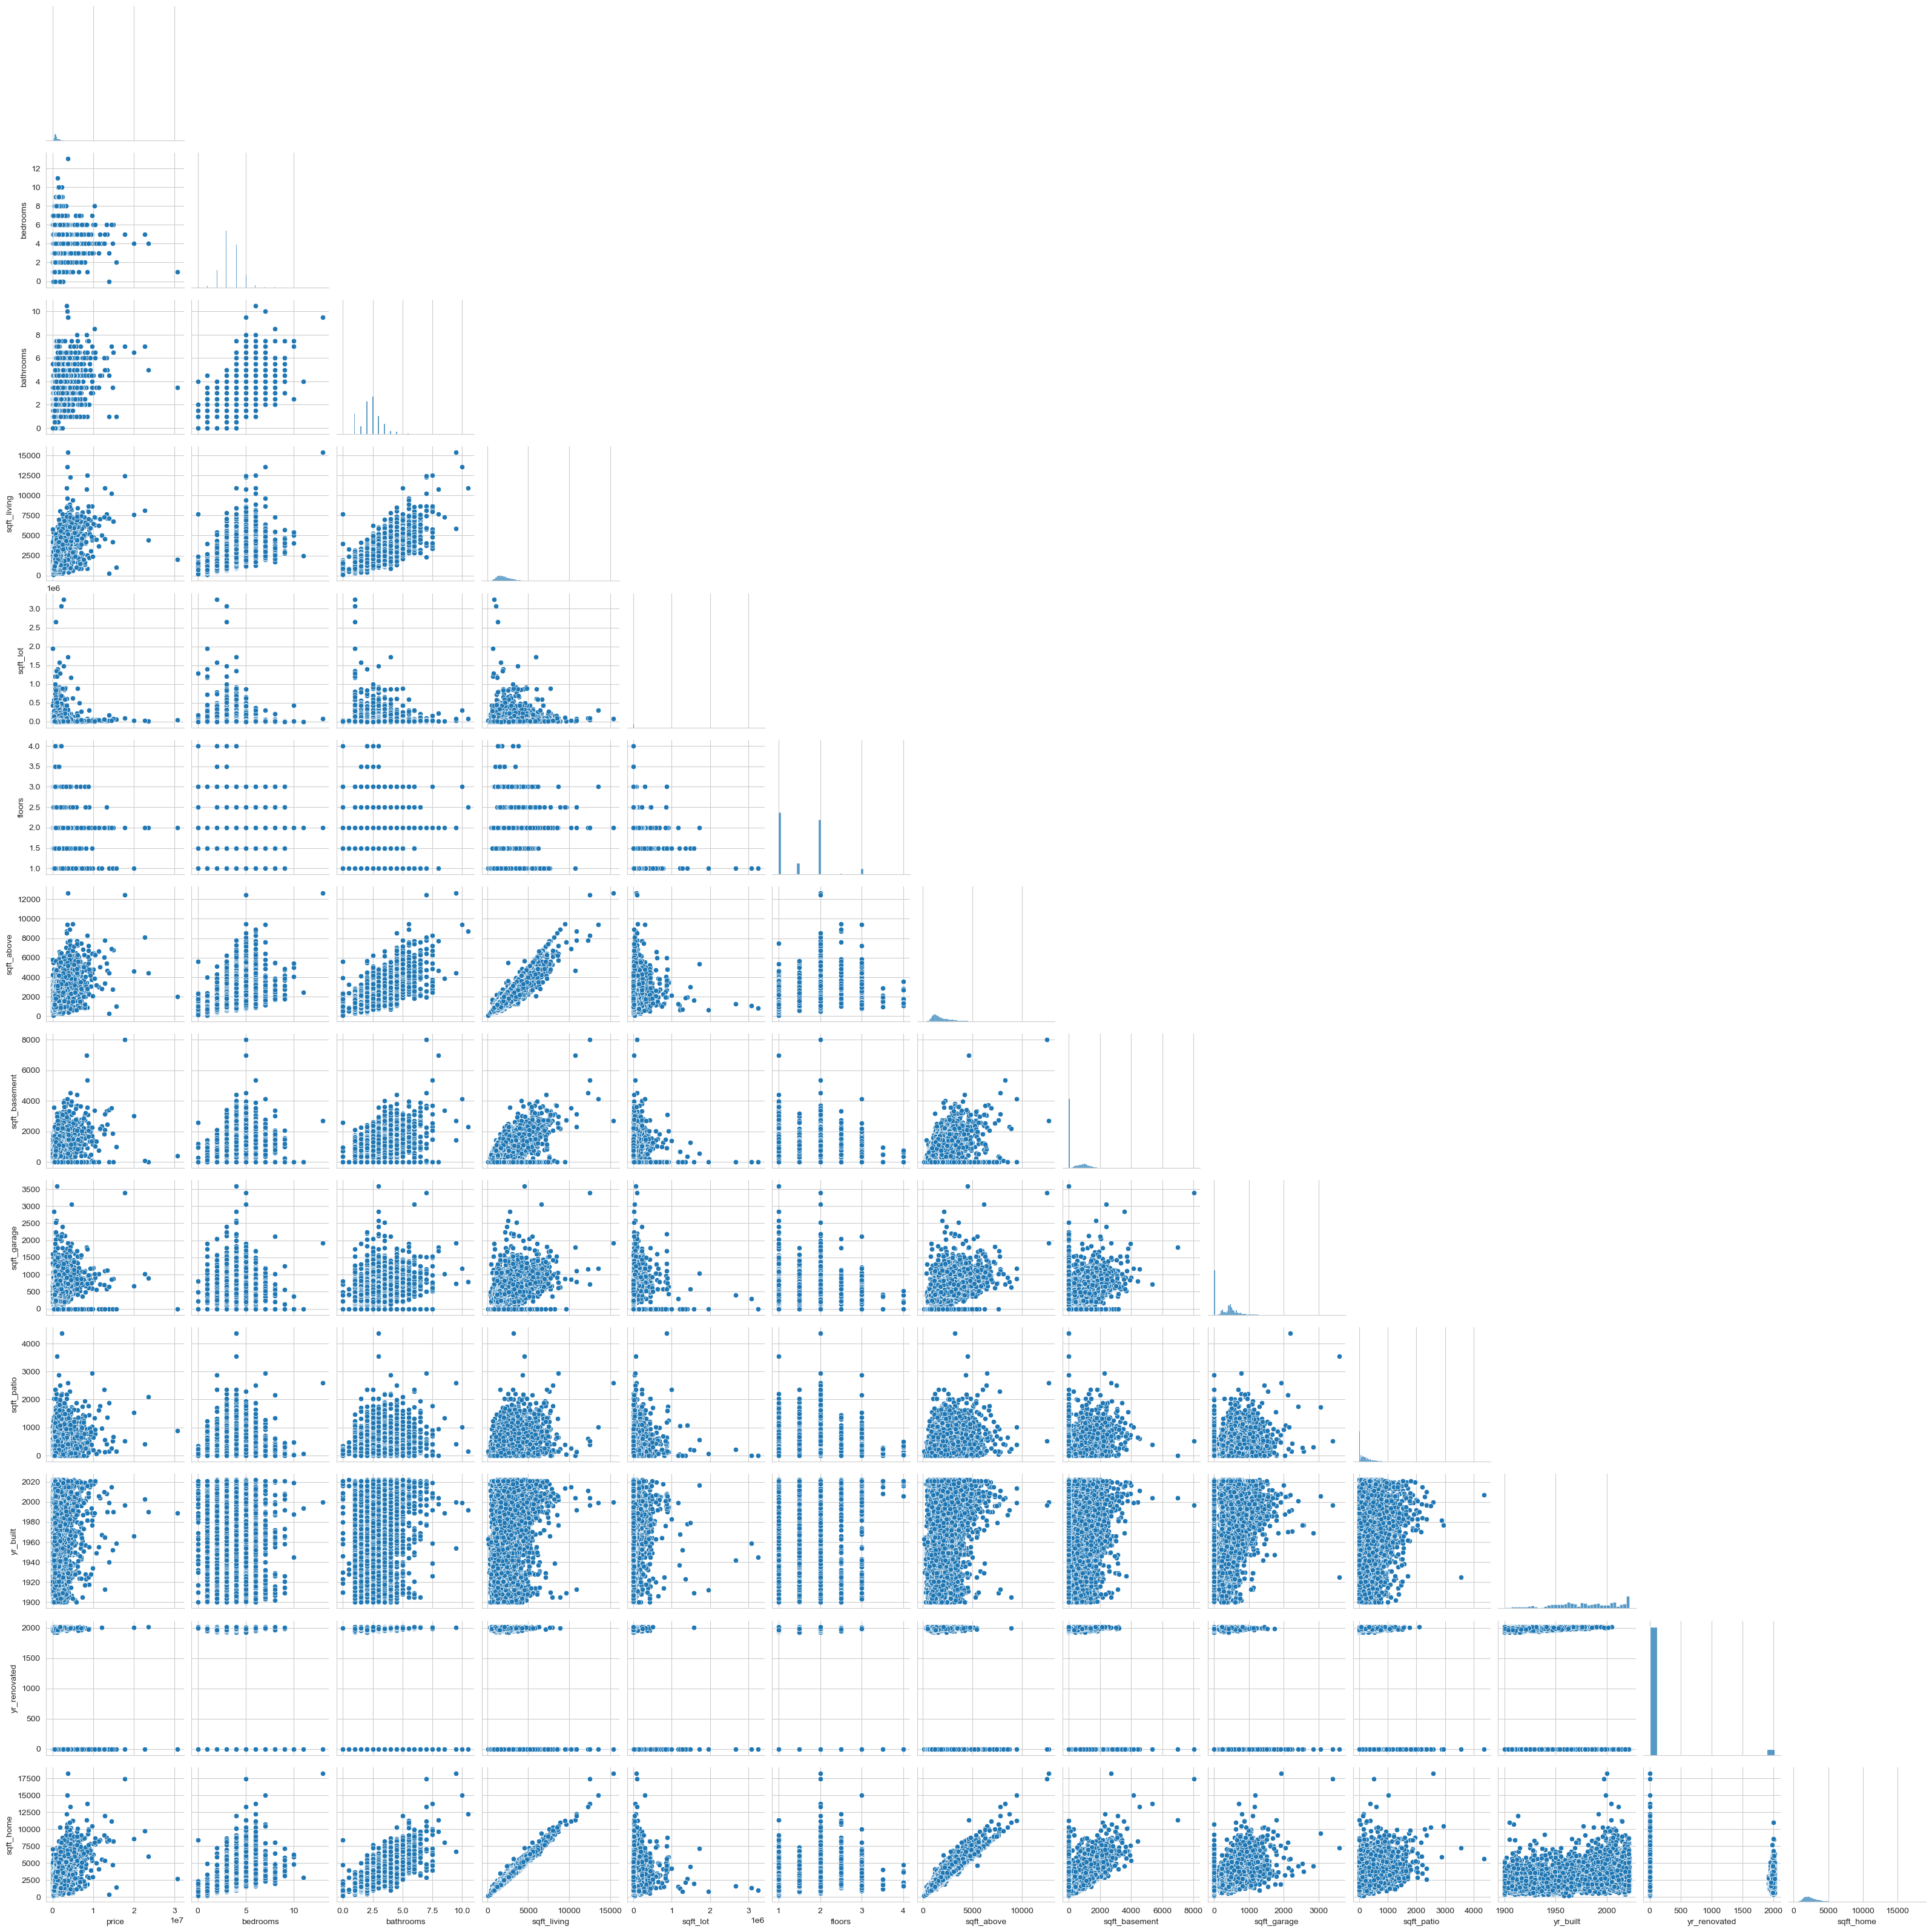

In [541]:
# plot only lower triangle due to symmetry
sns.pairplot(numeric_df, corner=True)
plt.show()

### Removing outliers for skewed Numeric features
Again 

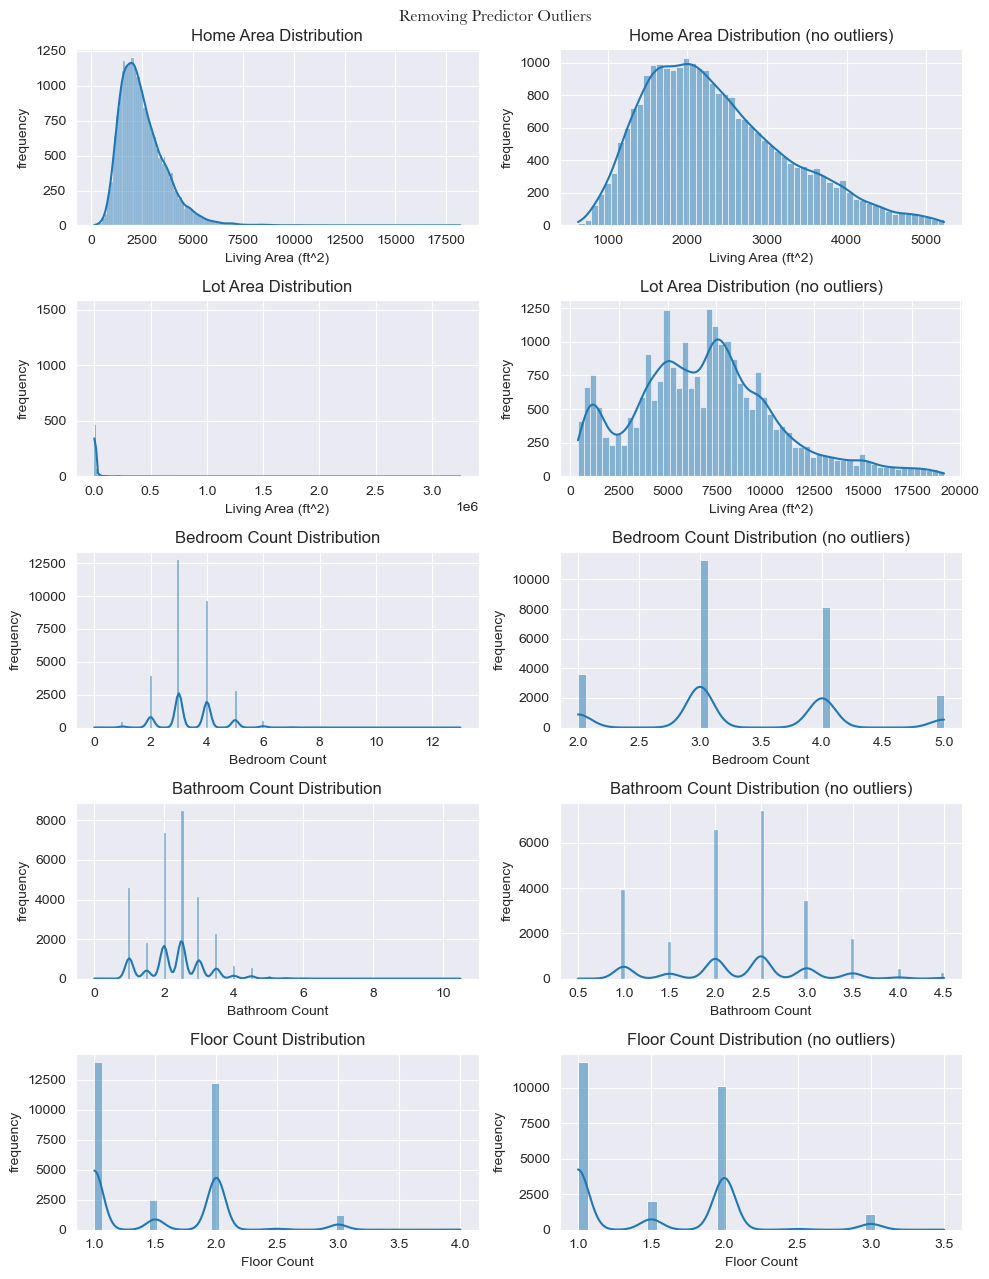

In [590]:
# remove outliers from features
outlier_features = ['sqft_home', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors']
outlier_u_bound = {}
outlier_l_bound = {}
# df to modify and compare with numeric_df
outlier_df = numeric_df[outlier_features]

# calculate outlier bounds with Inter Quartile Range Method on X_train
for col in outlier_features:
    IQR = numeric_df[col].quantile(.75) - numeric_df[col].quantile(.25)
    IQR_scaler = 1.5
    outlier_u_bound[col] = numeric_df[col].quantile(.75) + IQR_scaler * IQR
    outlier_l_bound[col] = numeric_df[col].quantile(.25) - IQR_scaler * IQR

# slice out outliers from data
for col in outlier_features:
    outlier_df = outlier_df.loc[(outlier_df[col] <= outlier_u_bound[col]) &\
                                (outlier_df[col] >= outlier_l_bound[col])]

# plot
fig, ax = plt.subplots(nrows=len(outlier_features), ncols=2, figsize=(10,13))
sns.set_style('darkgrid')
fig.suptitle('Removing Predictor Outliers', fontfamily='Baskerville')
data = [numeric_df, outlier_df]
titles = [['Home Area Distribution', 'Home Area Distribution (no outliers)'],
          ['Lot Area Distribution', 'Lot Area Distribution (no outliers)'],
          ['Bedroom Count Distribution', 'Bedroom Count Distribution (no outliers)'],
          ['Bathroom Count Distribution', 'Bathroom Count Distribution (no outliers)'],
          ['Floor Count Distribution','Floor Count Distribution (no outliers)']]
xlabels = ['Living Area (ft^2)','Living Area (ft^2)','Bedroom Count','Bathroom Count','Floor Count']

for row in range(len(outlier_features)):
    for col in range(2):
        sns.histplot(x=outlier_features[row], data=data[col], kde=True, bins='auto', ax=ax[row][col])
        ax[row][col].set_xlabel(xlabels[row])
        ax[row][col].set_ylabel('frequency')
        ax[row][col].set_title(titles[row][col])


plt.tight_layout()

plt.savefig('imgs/feature_outliers_all.png')
plt.show()

# Helper Functions

In [ ]:
# OLS
def get_train_score(xtrain, ytrain):
    lr = lm.LinearRegression()
    lr.fit(xtrain, ytrain)
    return lr.score(xtrain, ytrain)

def get_adjusted_train_score(xtrain, ytrain):
    # test R-Squared
    R2 = get_train_score(xtrain,ytrain)
    # number of observations in test data
    n = xtrain.shape[0]
    # number of features in test data (including constant)
    k = xtrain.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def get_test_score(xtrain, ytrain, xtest, ytest):
    lr = lm.LinearRegression()
    lr.fit(xtrain, ytrain)
    return lr.score(xtest, ytest)

# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
def get_adjusted_test_score(xtrain, ytrain, xtest, ytest):
    # test R-Squared
    R2 = get_test_score(xtrain,ytrain,xtest,ytest)
    # number of observations in test data
    n = xtest.shape[0]
    # number of features in test data (including constant)
    k = xtest.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def print_train_scores(xtrain, ytrain):
    print(f"         Train R2: {get_train_score(xtrain, ytrain)}")
    print(f"Train Adjusted R2: {get_train_score(xtrain, ytrain)}")

def print_test_scores(xtrain, ytrain, xtest, ytest):
    print(f"         Test R2: {get_test_score(xtrain, ytrain, xtest, ytest)}")
    print(f"Test Adjusted R2: {get_test_score(xtrain, ytrain, xtest, ytest)}")


# RIDGE
def get_train_score_ridge(xtrain, ytrain):
    rr = lm.Ridge()
    rr.fit(xtrain, ytrain)
    return rr.score(xtrain, ytrain)

def get_adjusted_train_score(xtrain, ytrain):
    # test R-Squared
    R2 = get_train_score_ridge(xtrain,ytrain)
    # number of observations in test data
    n = xtrain.shape[0]
    # number of features in test data (including constant)
    k = xtrain.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def get_test_score_ridge(xtrain, ytrain, xtest, ytest):
    rr = lm.Ridge()
    rr.fit(xtrain, ytrain)
    return rr.score(xtest, ytest)


def get_adjusted_test_score_ridge(xtrain, ytrain, xtest, ytest):
    # test R-Squared
    R2 = get_test_score(xtrain,ytrain,xtest,ytest)
    # number of observations in test data
    n = xtest.shape[0]
    # number of features in test data (including constant)
    k = xtest.shape[1] + 1
    return 1 - ( (1-R2) * ( (n-1)/(n-k-1 ) ) )

def print_train_scores_ridge(xtrain, ytrain):
    print(f"         Train R2: {get_train_score_ridge(xtrain, ytrain)}")
    print(f"Train Adjusted R2: {get_train_score_ridge(xtrain, ytrain)}")

def print_test_scores_ridge(xtrain, ytrain, xtest, ytest):
    print(f"         Test R2: {get_test_score_ridge(xtrain, ytrain, xtest, ytest)}")
    print(f"Test Adjusted R2: {get_test_score_ridge(xtrain, ytrain, xtest, ytest)}")







def scale_custom(xtrain, xtest, col_names):
    # normally scale regularly distributed columns
    scaler = StandardScaler()
    custom_xtrain = pd.DataFrame(data=scaler.fit_transform(xtrain.drop(columns=col_names)),
                                 index=xtrain.index,
                                 columns=[col for col in xtrain.columns if col not in col_names])
    custom_xtest = pd.DataFrame(data=scaler.transform(xtest.drop(columns=col_names)),
                                index=xtest.index,
                                columns=[col for col in xtest.columns if col not in col_names])

    # custom scale irregularly distributed columns
    bad_xtrain = xtrain[col_names]
    bad_xtest = xtest[col_names]
    for col in col_names:
        true_xtrain = bad_xtrain.loc[bad_xtrain[col] != 0][col]
        xtrain_true_mean = true_xtrain.mean()
        xtrain_true_std = true_xtrain.std()
        custom_xtrain[col] = bad_xtrain[col].apply(lambda x: 0 if x == 0 else (x - xtrain_true_mean) / xtrain_true_std)
        custom_xtest[col] = bad_xtest[col].apply(lambda x: 0 if x == 0 else (x - xtrain_true_mean) / xtrain_true_std)

    return (custom_xtrain, custom_xtest)
    
def powerset(col_names, num_cols_lower_bound):
    "powerset([1,2,3]) --> (1,2) (1,3) (2,3) (1,2,3)"
    s = list(col_names)
    return list(list(subset) for subset in chain.from_iterable(combinations(s, r) for r in range(len(s)+1)) if len(list(subset)) > num_cols_lower_bound)


# Train Test Split

In [545]:
# numeric Train test split (.75 train, .25 test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df[['price']], test_size=.25, random_state=42)

# Intercept only model

In [564]:
# set X to mean(y_train)
y = y_train
X = np.array([y['price'].mean()] * len(y)).reshape(-1,1)
xtest = np.array([y['price'].mean()] * len(y_test)).reshape(-1,1)

# Use sklearn to get R2 results and metrics
lr = lm.LinearRegression()
lr.fit(X,y)
print("Train R2:", get_train_score(X,y))
print("MSE:",metrics.mean_squared_error(y_test, lr.predict(xtest)))
print("RMSE:",metrics.mean_squared_error(y_test, lr.predict(xtest),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, lr.predict(xtest)))

# fit model and display statistics
intercept_only_model = sm.OLS(y,X)
intercept_only_results = intercept_only_model.fit()

intercept_only_results.summary()

Train R2: 0.0
MSE: 490167047505.1523
RMSE: 700119.3094788576
MAE: 490756.35557049187


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 Feb 2023   Prob (F-statistic):                nan
Time:                        16:40:40   Log-Likelihood:            -3.3501e+05
No. Observations:               22468   AIC:                         6.700e+05
Df Residuals:                   22467   BIC:                         6.700e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.004    224.353      0.000       0.991       1.009
==============================================================================
Omnibus:                    12962.465   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131671.619
Skew:                           2.638   Prob(JB):                         0.00
Kurtosis:                      13.621   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Pipeline

In [513]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0) # (30155,25), 3 duplicated entries
# display(df.loc[df.duplicated(keep=False)])
df.drop_duplicates(inplace=True)
# Aggregate feature
df["sqft_home"] = (.61*df['sqft_living'] + \
                   .54*df['sqft_above'] + \
                   .25*df['sqft_basement'] + \
                   .27*df['sqft_garage'] + \
                   .31*df['sqft_patio'])

# drop suspicious row with 4 bathrooms and bedrooms but no living space
df.drop(index=1549500215, inplace=True)

# numeric Train test split (.75 train, .25 test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df[['price']], test_size=.25, random_state=42)

# remove price outliers
y_train = y_train.loc[(y_train['price'] > 78000) & (y_train['price'] < 7000000)]
y_test = y_test.loc[(y_test['price'] > 78000) & (y_test['price'] < 7000000)]
# slice Feature data to match target data indicies
X_train = X_train.loc[y_train.index]
X_test = X_test.loc[y_test.index]

# remove outliers from features
outlier_features = ['sqft_home', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors']
outlier_u_bound = {}
outlier_l_bound = {}

# calculate outlier bounds with Inter Quartile Range Method on X_train
for col in outlier_features:
    IQR = X_train[col].quantile(.75) - X_train[col].quantile(.25)
    IQR_scaler = 1.5
    outlier_u_bound[col] = X_train[col].quantile(.75) + IQR_scaler * IQR
    outlier_l_bound[col] = X_train[col].quantile(.25) - IQR_scaler * IQR

# slice out outliers from data
for col in outlier_features:
    X_train = X_train.loc[(X_train[col] <= outlier_u_bound[col]) &\
                          (X_train[col] >= outlier_l_bound[col])]
    X_test = X_test.loc[(X_test[col] <= outlier_u_bound[col]) &\
                        (X_test[col] >= outlier_l_bound[col])]

# remove outliers from bedroom, sqft_living
# X_train = X_train.loc[X_train['bedrooms'] <= 10]  
# X_train = X_train.loc[(X_train['sqft_living'] <= 8000) & (X_train['sqft_living'] > 400)]  
# y_train = y_train.loc[X_train.index]

# X_test = X_test.loc[X_test['bedrooms'] <= 10]  
# X_test = X_test.loc[X_test['sqft_living'] <= 8000]  
# X_test = X_test.loc[(X_test['sqft_living'] <= 8000) & (X_test['sqft_living'] > 400)]  
# y_test = y_test.loc[X_test.index]

# Ordinal Encoding
oe_cols = ['view', 'condition', 'grade']
oe_orders = [['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],
             ['Poor','Fair','Average','Good','Very Good'],
             ['1 Cabin',
              '2 Substandard',
              '3 Poor',
              '4 Low',
              '5 Fair',
              '6 Low Average',
              '7 Average',
              '8 Good',
              '9 Better',
              '10 Very Good',
              '11 Excellent',
              '12 Luxury',
              '13 Mansion']]

for col, order in zip(oe_cols,oe_orders):
    oe = OrdinalEncoder([order]).fit(X_train[[col]])
    X_train[col] = oe.transform(X_train[[col]])
    X_test[col] = oe.transform(X_test[[col]])


# label Encoding
le_cols = ['waterfront','greenbelt', 'nuisance']

for col in le_cols:
    le = LabelEncoder().fit(X_train[[col]])
    X_train[col] = le.transform(X_train[[col]])
    X_test[col] = le.transform(X_test[[col]])


    
# setting up zipcode column
# King County Zipcodes
# https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033
ci_zips = ['98002 (Auburn)', '98092 (Auburn)', '98224 (Baring)', '98004 (Bellevue)', '98005 (Bellevue)', '98006 (Bellevue)', '98007 (Bellevue)', '98008 (Bellevue)', '98010 (Black Diamond)', '98011 (Bothell)', '98178 (Bryn Mawr-Skyway)', '98148 (Burien)', '98166 (Burien)', '98014 (Carnation)', '98077 (Cottage Lake)', '98042 (Covington)', '98198 (Des Moines)', '98019 (Duvall)', '98031 (East Hill-Meridian)', '98022 (Enumclaw)', '98058 (Fairwood)', '98024 (Fall City)', '98003 (Federal Way)', '98023 (Federal Way)', '98027 (Issaquah)', '98029 (Issaquah)', '98028 (Kenmore)', '98032 (Kent)', '98030 (Kent)', '98033 (Kirkland)', '98034 (Kirkland)', '98001 (Lakeland North)', '98038 (Maple Valley)', '98039 (Medina)', '98040 (Mercer Island)', '98045 (North Bend)', '98047 (Pacific)', '98050 (Preston)', '98051 (Ravensdale)', '98052 (Redmond)', '98055 (Renton)', '98056 (Renton)', '98057 (Renton)', '98059 (Renton)', '98074 (Sammamish)', '98075 (Sammamish)', '98188 (SeaTac)', '98199 (Seattle)', '98174 (Seattle)', '98154 (Seattle)', '98158 (Seattle)', '98164 (Seattle)', '98101 (Seattle)', '98102 (Seattle)', '98103 (Seattle)', '98104 (Seattle)', '98105 (Seattle)', '98106 (Seattle)', '98107 (Seattle)', '98108 (Seattle)', '98109 (Seattle)', '98112 (Seattle)', '98115 (Seattle)', '98116 (Seattle)', '98117 (Seattle)', '98118 (Seattle)', '98119 (Seattle)', '98121 (Seattle)', '98122 (Seattle)', '98125 (Seattle)', '98126 (Seattle)', '98133 (Seattle)', '98134 (Seattle)', '98136 (Seattle)', '98144 (Seattle)', '98155 (Shoreline)', '98177 (Shoreline)', '98288 (Skykomish)', '98065 (Snoqualmie)', '98168 (Tukwila)', '98053 (Union Hill-Novelty Hill)', '98195 (Univ Of Washington)', '98070 (Vashon)', '98146 (White Center)', '98072 (Woodinville)']
ci_zips = set([x.split()[0] for x in ci_zips])

X_train['zipcode'] = [address.split(',')[-2][-5:] for address in X_train['address']]
X_train['zipcode'] = X_train['zipcode'].apply(lambda x: x if x in ci_zips else np.nan)

X_test['zipcode'] = [address.split(',')[-2][-5:] for address in X_test['address']]
X_test['zipcode'] = X_test['zipcode'].apply(lambda x: x if x in ci_zips else np.nan)

# drop rows outside King county
old_idxs = set(X_train.index)
X_train.dropna(inplace=True)

old_idxs = set(X_test.index)
X_test.dropna(inplace=True)

# setting up streetname column
X_train['street_name'] = [address.split(',')[0] for address in X_train['address']]
X_test['street_name'] = [address.split(',')[0] for address in X_test['address']]

ohe_cols = ['zipcode']

ohe = OneHotEncoder(sparse = False, drop='first')
train_ohe_df = ohe.fit_transform(X_train[ohe_cols])
train_ohe_df = pd.DataFrame(train_ohe_df, columns = ohe.get_feature_names(), index = X_train.index)
train_ohe_df

test_ohe_df = ohe.transform(X_test[ohe_cols])
test_ohe_df = pd.DataFrame(test_ohe_df, columns = ohe.get_feature_names(), index = X_test.index)

# Regular Scaling
numeric_cols = ['bedrooms',
                'bathrooms',
                # 'sqft_living',
                'sqft_lot',
                'floors',
                # 'sqft_above',
                'yr_built',
                # 'sqft_basement',
                # 'sqft_garage',
                # 'sqft_patio',
                'sqft_home',
                'yr_renovated'] + oe_cols

# Unstandardized polynomial features for coeficient analysis
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
poly_ = pd.DataFrame(data=poly.fit_transform(X_train[numeric_cols]),
                     index=X_train.index,
                     columns=poly.get_feature_names(numeric_cols))
p_mean = poly_.mean()
poly_means = {col:p_mean[col] for col in p_mean.index}
p_std = poly_.std()
poly_std = {col:p_std[col] for col in p_std.index}

# standardize continuous features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# POLYNOIAL FEATURES
# numeric_cols = list(set(X_train.columns.to_list()) - set(['nuisance', 'greenbelt', 'waterfront']))
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
train_poly = pd.DataFrame(data=poly.fit_transform(X_train[numeric_cols]),
                          index=X_train.index,
                          columns=poly.get_feature_names(numeric_cols))
test_poly = pd.DataFrame(data=poly.transform(X_test[numeric_cols]),
                          index=X_test.index,
                          columns=poly.get_feature_names(numeric_cols))

X_train = X_train[le_cols]
X_train = pd.concat([X_train, train_poly], 1)
X_train = pd.concat([X_train, train_ohe_df], 1)

X_test = X_test[le_cols]
X_test = pd.concat([X_test, test_poly], 1)
X_test = pd.concat([X_test, test_ohe_df], 1)


# slice target data to match feature data indicies
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

# sklearn
lr = lm.LinearRegression()
lr.fit(X_train,y_train)
print("Train R2:", get_train_score(X_train, y_train))
print("Train Adjusted R2:", get_adjusted_train_score(X_train, y_train))
print_test_scores(X_train, y_train, X_test, y_test)

# statsmodel
model = sm.OLS(y_train,sm.add_constant(X_train))
results = model.fit()

print("MSE:",metrics.mean_squared_error(y_test, lr.predict(X_test)))
print("RMSE:",metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, lr.predict(X_test)))
results.summary()

Train R2: 0.7418807638836541
Train Adjusted R2: 0.7395699989137058
         Test R2: 0.7732401905328938
Test Adjusted R2: 0.7732401905328938
MSE: 75723460168.20749
RMSE: 275178.96025715244
MAE: 177886.7727417992


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     393.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:20:18   Log-Likelihood:            -2.5528e+05
No. Observations:               18197   AIC:                         5.108e+05
Df Residuals:                   18064   BIC:                         5.119e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.537e+05   1.58e+04     35.082      0.000    5.23e+05    5.85e+05
waterfront              5.491e+05   2.99e+04     18.366      0.000     4.9e+05    6.08e+05
greenbelt               3.825e+04   1.48e+04      2.592      0.010    9323.180    6.72e+04
nuisance               -5.124e+04   6295.340     -8.139      0.000   -6.36e+04   -3.89e+04
bedrooms                5231.8601   3264.191      1.603      0.109   -1166.265    1.16e+04
bathrooms               2.451e+04   3952.741      6.200      0.000    1.68e+04    3.23e+04
sqft_lot                3.128e+04   3443.357      9.084      0.000    2.45e+04     3.8e+04
floors                  7308.2198   3631.140      2.013      0.044     190.839    1.44e+04
yr_built                2.143e+04   4869.954      4.401      0.000    1.19e+04     3.1e+04
sqft_home               1.678e+05   5303.148     31.641      0.000    1.57e+05    1.78e+05
yr_renovated            2.136e+04   5061.934      4.220      0.000    1.14e+04    3.13e+04
view                    2.804e+04   3333.517      8.412      0.000    2.15e+04    3.46e+04
condition               4.144e+04   3306.613     12.531      0.000     3.5e+04    4.79e+04
grade                   8.792e+04   4119.201     21.345      0.000    7.98e+04     9.6e+04
bedrooms bathrooms      3581.8598   4309.174      0.831      0.406   -4864.532     1.2e+04
bedrooms sqft_lot       1729.2155   3706.461      0.467      0.641   -5535.802    8994.233
bedrooms floors         1943.4605   4309.972      0.451      0.652   -6504.496    1.04e+04
bedrooms yr_built       7586.6624   4136.816      1.834      0.067    -521.891    1.57e+04
bedrooms sqft_home     -1.554e+04   4809.418     -3.232      0.001    -2.5e+04   -6117.800
bedrooms yr_renovated   1291.8652   3040.118      0.425      0.671   -4667.056    7250.786
bedrooms view            498.6322   3006.253      0.166      0.868   -5393.911    6391.175
bedrooms condition       645.6098   3348.599      0.193      0.847   -5917.963    7209.182
bedrooms grade           751.0826   4567.925      0.164      0.869   -8202.486    9704.651
bathrooms sqft_lot       1.01e+04   4323.185      2.336      0.020    1625.081    1.86e+04
bathrooms floors       -1975.1225   5477.050     -0.361      0.718   -1.27e+04    8760.418
bathrooms yr_built     -2134.8073   4605.190     -0.464      0.643   -1.12e+04    6891.804
bathrooms sqft_home     9720.1138   5209.287      1.866      0.062    -490.585    1.99e+04
bathrooms yr_renovated -2534.9907   3481.063     -0.728      0.466   -9358.205    4288.224
bathrooms view          1947.3525   3597.699      0.541      0.588   -5104.481    8999.186
bathrooms condition      482.5122   3960.089      0.122      0.903   -7279.639    8244.664
bathrooms grade         1.972e+04   5366.771      3.675      0.000    9204.395  

### resid plot

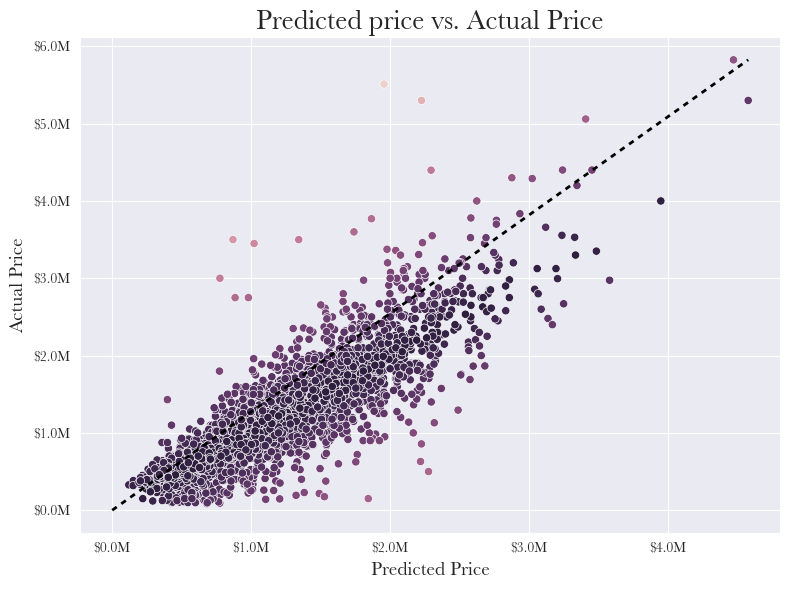

In [514]:
y_hat = lr.predict(X_test)

y_df = pd.DataFrame({'hat':y_hat.flatten()}, index=range(y_hat.shape[0]))
y_df['actual'] = y_test['price'].to_list()
y_df['resid'] = y_df['hat'] - y_df['actual']

fig, ax = plt.subplots(figsize=(8,6))
# sns.jointplot(x= 'actual',y= 'resid', data=y_df).set()
sns.scatterplot(x='hat',y='actual', data=y_df, hue=-np.abs(y_df['resid']))
ax.legend([],[], frameon=False)
plt.xlabel('Predicted Price', fontdict={'fontfamily':'Baskerville',
                                        'fontsize':14,
                                        'fontweight':'bold'})
plt.ylabel('Actual Price', fontdict={'fontfamily':'Baskerville',
                                     'fontsize':14,
                                     'fontweight':'bold'})
plt.title('Predicted price vs. Actual Price', fontdict={'fontfamily':'Baskerville',
                                                        'fontsize':20,
                                                        'fontweight':'bold'})
plt.xticks(fontfamily='Baskerville')
plt.yticks(fontfamily='Baskerville')
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.1fM' % (x * 1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.plot([0, y_df['hat'].max()], [0, y_df['actual'].max()], linewidth=2, color='black', dashes=[2,2])
plt.tight_layout()

# plt.savefig('imgs/final_resid.png')
plt.show()

In [ ]:
feat_names = list(le_cols + train_poly.columns.to_list())
n = len(feat_names)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    coefs = pd.DataFrame(columns=['feature','abs_coef_'])
    coefs['coef_'] = pd.Series(lr.coef_.flatten())
    coefs['abs_coef_'] = pd.Series(np.abs(lr.coef_.flatten()))
    coefs = coefs.sort_values(by='abs_coef_', ascending=False)
    coefs['feature'] = [(feat_names[i] if i < n else np.nan) for i in list(coefs['abs_coef_'].index)]
    coefs.drop(index=coefs.loc[coefs['feature'].isna()].index, inplace=True)
    coefs['price_increment'] = [(coef - poly_means[coefs['feature'].iloc[i]])/ poly_std[coefs['feature'].iloc[i]] if coefs['feature'].iloc[i] not in le_cols else coef for i, coef in enumerate(coefs['coef_'])]
    coefs['bse_scaled'] = [(results.bse[i] - poly_means[coefs['feature'].iloc[i]])/ poly_std[coefs['feature'].iloc[i]] if coefs['feature'].iloc[i] not in le_cols else results.bse[i] for i, coef in enumerate(coefs['coef_'])]
    coefs['b_se'] = [results.bse[i] for i in coefs.index]
    coefs['pval'] = [results.pvalues.values[i] for i in coefs.index]
    
    display(coefs.head(20))

,feature,abs_coef_,coef_,price_increment,bse_scaled,b_se,pval
0,waterfront,549080.013611,549080.013611,549080.013611,15784.374122,15784.374122,6.723299e-261
8,sqft_home,167794.351888,167794.351888,184.338281,30.656616,4869.954227,1.085508e-05
12,grade,87923.995829,87923.995829,88876.451166,14911.380705,3306.612628,7.098665e-36
51,sqft_home grade,53860.032426,53860.032426,4.567595,-1.208948,5721.699472,1.242523e-02
2,nuisance,51238.943104,-51238.943104,-51238.943104,3264.190928,14757.024210,9.553142e-03
32,sqft_lot sqft_home,49456.006350,-49456.006350,-1.434752,-1.430445,4624.097401,1.663304e-03
11,condition,41436.090172,41436.090172,58882.673234,4889.930078,3333.517172,4.320323e-17
1,greenbelt,38248.354337,38248.354337,38248.354337,3631.140005,29897.234089,1.184420e-74
5,sqft_lot,31278.225720,31278.225720,6.713369,-0.634180,3952.740642,5.774949e-10
56,view grade,29790.045974,29790.045974,5350.622480,952.253207,2379.293752,5.674898e-01


### Top feature coefs_

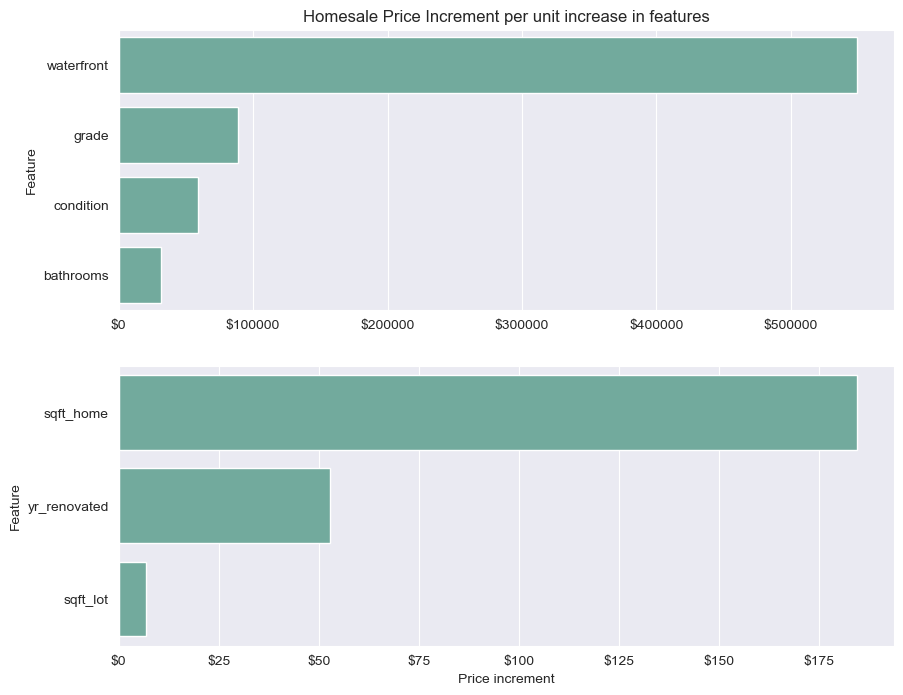

In [528]:
# Set the figure size
fig, ax = plt.subplots(nrows=2,figsize=(10, 8))
# bar
data = coefs.loc[(coefs['feature'] == 'waterfront') | \
                 (coefs['feature'] == 'grade') | \
                 (coefs['feature'] == 'condition') | \
                 (coefs['feature'] == 'bathrooms') ]
sns.barplot(
    x="price_increment", 
    y="feature", 
    data=data, 
    color='#69b3a2',
    ax = ax[0]
)
formatter = ticker.FuncFormatter(lambda x, pos: '$%1.0f' % (x))
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlabel('')
ax[0].set_ylabel('Feature')
ax[0].set_title("Homesale Price Increment per unit increase in features")

# bar
data = coefs.loc[(coefs['feature'] == 'sqft_home') | \
                 (coefs['feature'] == 'yr_renovated') | \
                 (coefs['feature'] == 'sqft_lot')]
sns.barplot(
    x="price_increment", 
    y="feature", 
    data=data, 
    color='#69b3a2',
    order=['sqft_home','yr_renovated', 'sqft_lot'],
    ax = ax[1]
)
ax[1].set_xlabel('Price increment')
ax[1].set_ylabel('Feature')
ax[1].xaxis.set_major_formatter(formatter)
plt.show()

### VIF check

In [517]:
vif_data = pd.DataFrame()
vif_data["feature"] = list(set(X_train.columns.to_list()) - set(train_ohe_df.columns.to_list()))


X = X_train[list(set(X_train.columns.to_list()) - set(train_ohe_df.columns.to_list()))]
# calculating VIF for each feature
vif_data["VIF"] = [VIF(X.values, i) for i in range(X.shape[1])]
vif_data['coef_'] = pd.Series(lr.coef_.flatten())
vif_data['pval'] = [results.pvalues.values[i] for i in coefs.index]
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(vif_data.head(20))



,feature,VIF,coef_,pval
45,bathrooms sqft_home,10.622105,-17293.760122,8.667726e-01
24,yr_built sqft_home,10.397014,-2134.807289,8.693982e-01
17,sqft_home grade,9.677020,-15544.718183,5.477720e-01
4,bathrooms grade,9.538571,24506.335061,9.553142e-03
49,floors sqft_home,8.707043,2521.287765,5.702189e-03
0,bedrooms sqft_home,6.822180,549080.013611,6.723299e-261
15,sqft_home view,6.145056,1943.460488,9.030241e-01
39,sqft_home condition,5.906337,-5444.906293,4.628328e-01
53,bathrooms floors,5.559590,-6757.905549,3.244796e-02
18,sqft_home,5.475356,1291.865229,4.136449e-08


In [507]:
vif_data.loc[vif_data['VIF'] > 5]['feature'].to_list()

['bathrooms sqft_home',
 'yr_built sqft_home',
 'sqft_home grade',
 'bathrooms grade',
 'floors sqft_home',
 'bedrooms sqft_home',
 'sqft_home view',
 'sqft_home condition',
 'bathrooms floors',
 'sqft_home',
 'bedrooms bathrooms']

## fit model to log(price)

In [494]:
# sklearn
lr = lm.LinearRegression()
lr.fit(X_train,np.log(y_train))
print("Train R2:", get_train_score(X_train, np.log(y_train)))
print("Train Adjusted R2:", get_adjusted_train_score(X_train, np.log(y_train)))
print_test_scores(X_train, np.log(y_train), X_test, np.log(y_test))

# statsmodel
model = sm.OLS(np.log(y_train),sm.add_constant(X_train))
results = model.fit()
print("MSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test))))
print("RMSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test)),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, np.exp(lr.predict(X_test))))
results.summary()

Train R2: 0.7332905566201002
Train Adjusted R2: 0.7303974162493752
         Test R2: 0.7526633920188472
Test Adjusted R2: 0.7526633920188472
MSE: 70866708088.92041
RMSE: 266208.01657523465
MAE: 161781.77629753645


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     349.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:01:14   Log-Likelihood:                -1761.3
No. Observations:               18197   AIC:                             3809.
Df Residuals:                   18054   BIC:                             4925.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12.8014      0.056    230.507      0.000      12.693      12.910
waterfront                 0.2300      0.028      8.186      0.000       0.175       0.285
greenbelt                  0.0492      0.013      3.743      0.000       0.023       0.075
nuisance                  -0.0493      0.006     -8.775      0.000      -0.060      -0.038
bedrooms                   0.0031      0.003      1.029      0.304      -0.003       0.009
bathrooms                  0.0211      0.004      5.786      0.000       0.014       0.028
sqft_lot                   0.0609      0.004     14.662      0.000       0.053       0.069
floors                     0.0023      0.004      0.626      0.531      -0.005       0.010
yr_built                   0.0448      0.005      8.746      0.000       0.035       0.055
sqft_home                  0.1608      0.005     32.031      0.000       0.151       0.171
yr_renovated              -1.9593      0.243     -8.047      0.000      -2.437      -1.482
view                       0.0190      0.006      2.999      0.003       0.007       0.031
condition                  0.0542      0.003     15.680      0.000       0.047       0.061
grade                      0.0832      0.004     22.483      0.000       0.076       0.090
bedrooms^2                -0.0061      0.003     -2.216      0.027      -0.011      -0.001
bedrooms bathrooms         0.0093      0.004      2.091      0.037       0.001       0.018
bedrooms sqft_lot          0.0022      0.003      0.653      0.514      -0.004       0.009
bedrooms floors            0.0031      0.004      0.811      0.418      -0.004       0.011
bedrooms yr_built          0.0038      0.004      1.017      0.309      -0.004       0.011
bedrooms sqft_home        -0.0050      0.006     -0.837      0.402      -0.017       0.007
bedrooms yr_renovated     -0.0017      0.003     -0.640      0.522      -0.007       0.004
bedrooms view             -0.0013      0.003     -0.464      0.642      -0.007       0.004
bedrooms condition         0.0021      0.003      0.686      0.493      -0.004       0.008
bedrooms grade            -0.0044      0.004     -1.005      0.315      -0.013       0.004
bathrooms^2               -0.0178      0.004     -4.829      0.000      -0.025      -0.011
bathrooms sqft_lot        -0.0031      0.004     -0.774      0.439      -0.011       0.005
bathrooms floors           0.0009      0.005      0.181      0.857      -0.009       0.011
bathrooms yr_built        -0.0062      0.005     -1.348      0.178      -0.015       0.003
bathrooms sqft_home        0.0156      0.007      2.388      0.017       0.003       0.028
bathrooms yr_renovated    -0.0009      0.003     -0.290      0.772      -0.007       0.005
bathrooms view            -0.0028      0.003     -0.854      0.393      -0.009  

### Mean Error log(target)

In [ ]:
print("MSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test))))
print("RMSE:",metrics.mean_squared_error(y_test, np.exp(lr.predict(X_test)),squared=False) )
print("MAE:",metrics.mean_absolute_error(y_test, np.exp(lr.predict(X_test))))

MSE: 115754719934.45175
RMSE: 340227.45323452627
MAE: 190281.8081081853
